Warning message:
“Removed 2 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_text()`).”


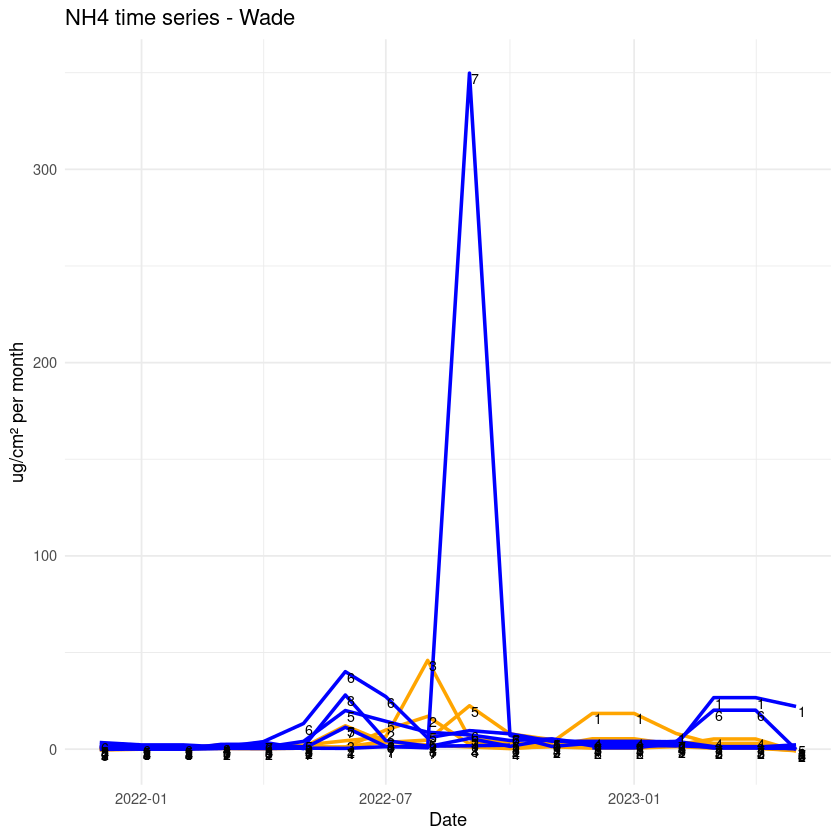

In [35]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(viridis)
library(dplyr)
library(lubridate)

###################
# SET DIRECTORIES #
###################

setwd("~//OneDrive/git-repos/EMMA")

input_dir <- "soil-resins/"
output_dir <- "soil-resins/output"

################
# READ IN DATA #
################

# Read in the compiled monthly available NH4/NO3 data (PO4 until 2023)
# And get the month and year columns into a machine readable date format
resin_data <- read.csv(file.path(input_dir, "Resin_timeseries.csv")) %>%
  mutate(Date = paste(Month, "1", Year, sep = " "),
         Date = mdy(Date))  # Convert the concatenated string to date format

# Read in event yield data
yield_data <- read.csv(file.path("~//OneDrive/git-repos/cQ_analysis//millar2021_R_separation_hysteresis/sonya-may24/custom-events_output/Wade_NO3_2021-2023_StormEventSummaryDataCustomDelineations.csv"))


######################
# PLOT TIME SERIES #
######################

# Filter data for Site = Hungerford and Species = Ammonium
hungerford_data <- resin_data %>%
  filter(Site == "Wade", Species == "Ammonium")

# Create the plot
ggplot(hungerford_data, aes(x = Date, y = ug_cm2_month, group = Pit)) +
  # Plot line for Dry transect with orange color
  geom_line(data = hungerford_data %>% filter(Transect == "Dry"),
            aes(color = "Dry"), size = 1, show.legend = FALSE) +
  # Plot line for Wet transect with blue color
  geom_line(data = hungerford_data %>% filter(Transect == "Wet"),
            aes(color = "Wet"), size = 1, show.legend = FALSE) +
  # Annotate Pit numbers
  geom_text(aes(label = Pit), hjust = -0.2, vjust = 1, size = 3) +
  # Set custom colors for Dry and Wet transects
  scale_color_manual(values = c("Dry" = "orange", "Wet" = "blue")) +
  # Add labels and theme
  labs(title = "NH4 time series - Wade",
       x = "Date",
       y = "ug/cm² per month",
       color = "Transect") +
  theme_minimal()

#############
# SAVE PLOT #
#############

ggsave("wade_ammonium_plot.png", width = 13, height = 6, dpi = 300)

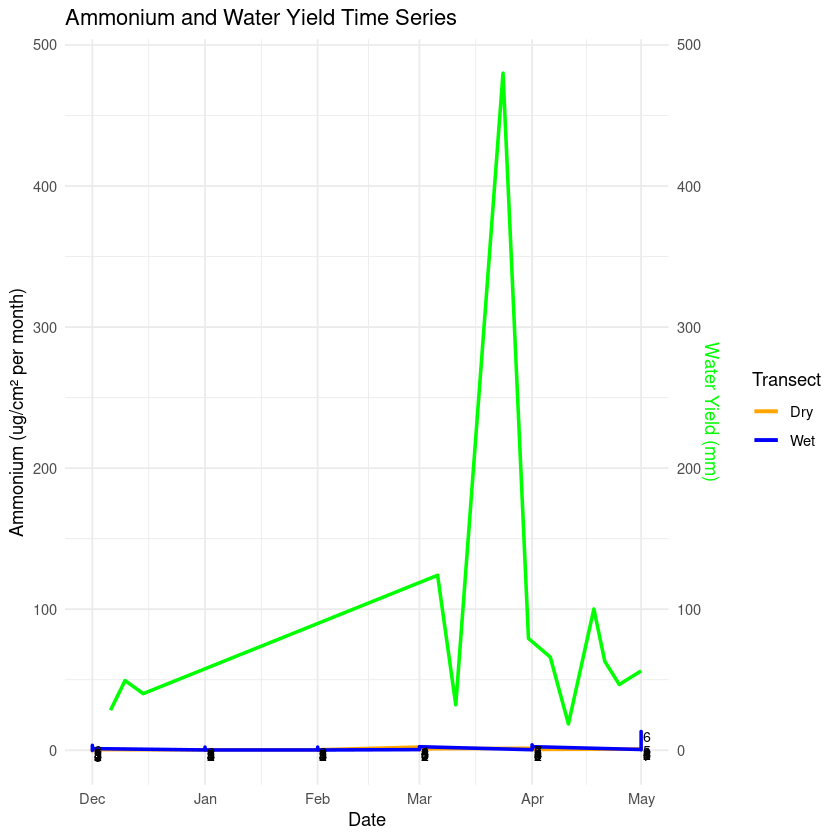

In [39]:
######################
# PLOT WITH 2 Y-AXES #
######################

# Convert the 'end' column in yield_data to Date format (remove time aspect)
yield_data <- yield_data %>%
  mutate(end = as.Date(end))

# Filter hungerford_data for the desired date range
hungerford_data_filtered <- hungerford_data %>%
  filter(Date >= as.Date("2021-12-01") & Date <= as.Date("2022-05-01"))

# Filter yield_data for the same date range
yield_data_filtered <- yield_data %>%
  filter(end >= as.Date("2021-12-01") & end <= as.Date("2022-05-01"))

# Create the plot
ggplot() +
  # Plot Ammonium data (primary Y-axis)
  geom_line(data = hungerford_data_filtered %>% filter(Transect == "Dry"),
            aes(x = Date, y = ug_cm2_month, color = "Dry"), size = 1) +
  geom_line(data = hungerford_data_filtered %>% filter(Transect == "Wet"),
            aes(x = Date, y = ug_cm2_month, color = "Wet"), size = 1) +
  # Plot water yield data (secondary Y-axis)
  geom_line(data = yield_data_filtered,
            aes(x = end, y = water_yield_mm), color = "green", size = 1) +
  # Annotate Pit numbers for Ammonium data
  geom_text(data = hungerford_data_filtered, aes(x = Date, y = ug_cm2_month, label = Pit), 
            hjust = -0.2, vjust = 1, size = 3) +
  # Custom colors for Ammonium transects
  scale_color_manual(values = c("Dry" = "orange", "Wet" = "blue")) +
  # Secondary Y-axis for water yield
  scale_y_continuous(
    name = "Ammonium (ug/cm² per month)",  # Primary Y-axis label
    sec.axis = sec_axis(~ ., name = "Water Yield (mm)")  # Secondary Y-axis label
  ) +
  # Define X-axis limits (date range)
  scale_x_date(limits = as.Date(c("2021-12-01", "2022-05-01"))) +
  # Add labels and theme
  labs(title = "Ammonium and Water Yield Time Series",
       x = "Date",
       color = "Transect") +
  theme_minimal() +
  theme(
    axis.title.y.right = element_text(color = "green")  # Color the secondary Y-axis label
  )
